<a href="https://colab.research.google.com/github/phutaekwondo/CS114.L21/blob/main/BT_colab_so_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [281]:
import pandas as pd
import numpy as np

***Xử lý dữ liệu***

In [282]:
url_train = 'http://cs.uit.edu.vn/data2.txt?fbclid=IwAR11i7MdMWgqg6i1ab0z3C1VRJLM_6BpnjlpS_hZmNhlBJeYjDihp479fnU'
url_test_1 = 'http://cs.uit.edu.vn/data3.txt?fbclid=IwAR0xQwlnCNoEWthoc8txwpYSHFuf-lo6KOAXMzum53EWy89fJChAaUqGzB8'
url_test_2 = 'http://cs.uit.edu.vn/data4.txt?fbclid=IwAR0fXuM2Q29pRBldP-sv9znzwYQCRCGe-VHLSvGeUcrvhkFR2UhxtCddIZQ'

In [283]:
data_train = pd.read_csv(url_train, header=None, names = ['x', 'y'])
data_test_1 = pd.read_csv(url_test_1, header=None, names = ['x', 'y'])
data_test_2 = pd.read_csv(url_test_2, header=None, names = ['x', 'y'])
X_train, y_train = np.array(data_train['x']).reshape(-1,1), np.array(data_train['y'])
X_test_1, y_test_1 = np.array(data_test_1['x']).reshape(-1,1), np.array(data_test_1['y'])
X_test_2, y_test_2 = np.array(data_test_2['x']).reshape(-1,1), np.array(data_test_2['y'])
y_data = np.concatenate((y_train, y_test_1, y_test_2))
X_data = np.concatenate((X_train, X_test_1, X_test_2))

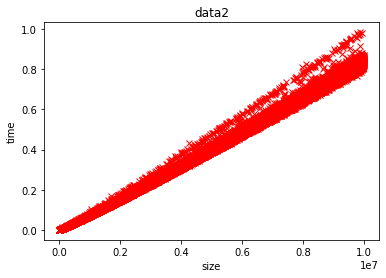

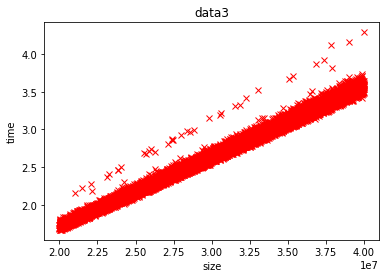

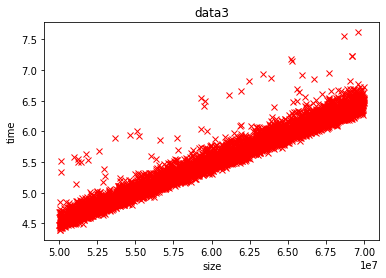

In [284]:
import matplotlib.pyplot as plt

plt.plot(X_train, y_train, "x", color='red')
plt.title("data2")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

plt.plot(X_test_1, y_test_1, "x", color='red')
plt.title("data3")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

plt.plot(X_test_2, y_test_2, "x", color='red')
plt.title("data3")
plt.xlabel('size')
plt.ylabel('time')
plt.show()

In [285]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score

def show_MSE(estimated, test):
    value1 = mse(estimated, test)
    value2 = mae(estimated, test)
    print('Mean squared error:', value1)
    print('Mean absolute error:', value2)

def draw_plot(X, y, estmated, name):
  r_sq = r2_score(estmated, y)
  print(name + ':')
  print('R squre:', r_sq)
  show_MSE(estmated, y)
  plt.plot(X, y, "x", color='red')
  plt.plot(X, estmated)
  plt.title(name)
  plt.xlabel('size')
  plt.ylabel('time')
  plt.show()

In [286]:
def draw_full(prediction, X=X_data, y=y_data):
  plt.plot(X, y, "x", color='red')
  plt.plot(X, prediction)
  plt.title("-----------------------Full data-----------------------")
  plt.xlabel('size')
  plt.ylabel('time')
  plt.show()

# **Polynomial Features Transformation Fuction**

Công thức chung:

Polynomial Features Transformation Fuction

$h(x) = \theta_0 + \theta_1 * x + ... + \theta_n * x^n$

In [287]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [288]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial(X, y, number):
  polynomial_features= PolynomialFeatures(degree=number)
  x_poly = polynomial_features.fit_transform(X)

  #Train data
  pol_LR = model.fit(x_poly, y)
  prediction_train = pol_LR.predict(x_poly)
  draw_plot(X, y, prediction_train, 'data train')

  #Test1_data
  X_test_1_poly = polynomial_features.fit_transform(X_test_1)
  prediction_test_1 = pol_LR.predict(X_test_1_poly)
  draw_plot(X_test_1, y_test_1, prediction_test_1, 'data test 1')

  #Test2_data
  X_test_2_poly = polynomial_features.fit_transform(X_test_2)
  prediction_test_2 = pol_LR.predict(X_test_2_poly)
  draw_plot(X_test_2, y_test_2, prediction_test_2, 'data test 2')

  #draw full data
  estimated_full = np.concatenate((prediction_train, prediction_test_1, prediction_test_2))
  draw_full(estimated_full)


data train:
R squre: -2.1473901933842613e+30
Mean squared error: 0.05955441229040034
Mean absolute error: 0.21145692332774532


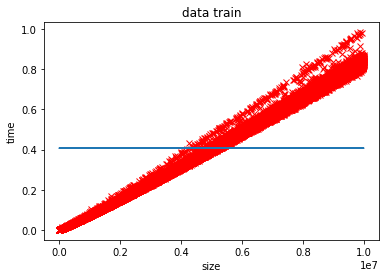

data test 1:
R squre: -4.290529670817179e+32
Mean squared error: 5.288486124997577
Mean absolute error: 2.236026880612991


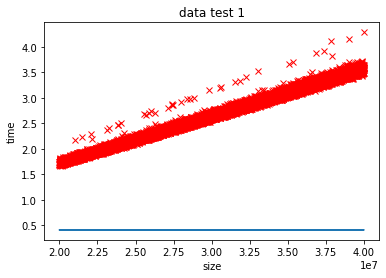

data test 2:
R squre: -9.50998775156144e+32
Mean squared error: 26.374421061342748
Mean absolute error: 5.103708439916586


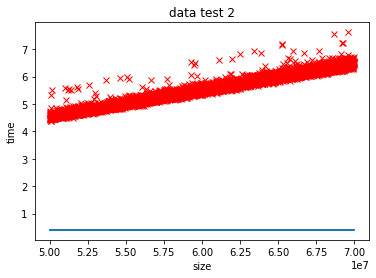

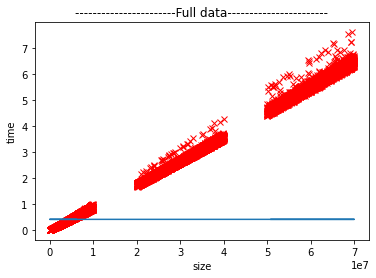

In [289]:
#cubic function regression
polynomial(X_train, y_train, 0)

***Đây chính là mô hình simple linear regression***

data train:
R squre: 0.9975866892874395
Mean squared error: 0.00014337728721748832
Mean absolute error: 0.008291970317762347


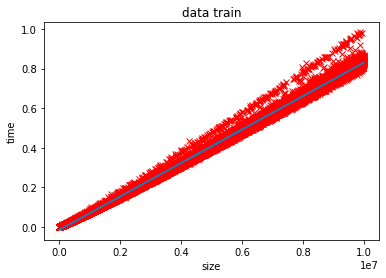

data test 1:
R squre: 0.9128585419715596
Mean squared error: 0.020664949397549138
Mean absolute error: 0.12271198006925255


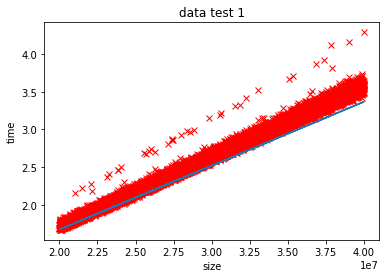

data test 2:
R squre: 0.06686808412903045
Mean squared error: 0.22348476817426108
Mean absolute error: 0.45201138673289265


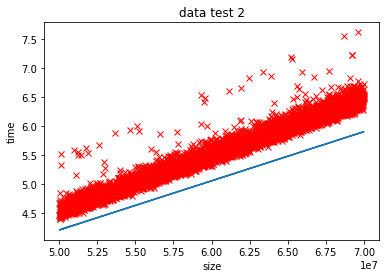

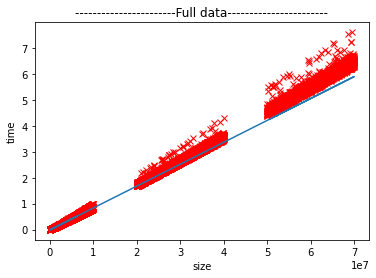

In [290]:
#simple linear regression
polynomial(X_train, y_train, 1)

data train:
R squre: 0.9979257340000984
Mean squared error: 0.00012327598540427578
Mean absolute error: 0.007073665718015936


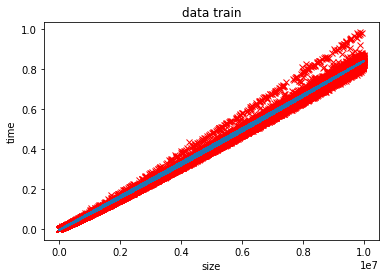

data test 1:
R squre: 0.7897335244514863
Mean squared error: 0.09177695238564393
Mean absolute error: 0.2703565635200137


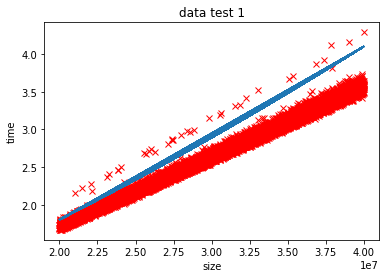

data test 2:
R squre: -1.667326264741582
Mean squared error: 2.034187428861318
Mean absolute error: 1.3859805816162731


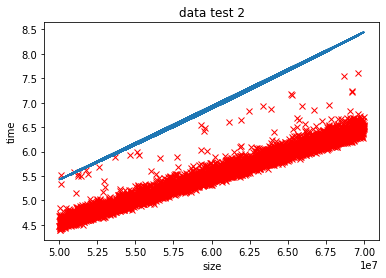

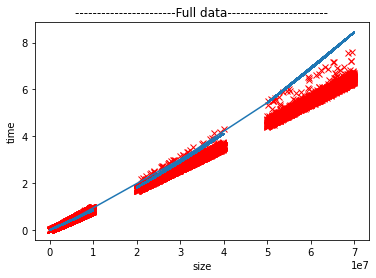

In [291]:
#quadratic function regression
polynomial(X_train, y_train, 2)

Phát hiện ra khi ta tăng bậc đa thức bậc lớn hơn 1 thì thấy MSE lớn, trong mô hình này thấy với bậc 1 (simple linear regression) là model tốt nhất. Còn trong trường hợp 0 thì trở thành hàm hằng
Vậy nên nên thử một loại regression là đa thức có căn.

# **Một số transformation function khác**

In [292]:
def transformation_function(func, name):
  feature_train = func(X_train)
  _model = LinearRegression().fit(feature_train, y_train)
  _predict = _model.predict(feature_train)
  draw_plot(X_train, y_train, _predict, name + ' model train')

  feature_test1 = func(X_test_1)
  _predict_1 = _model.predict(feature_test1)
  draw_plot(X_test_1, y_test_1, _predict_1, name + ' model test 1')

  feature_test2 = func(X_test_2)
  _predict_2 = _model.predict(feature_test2)
  draw_plot(X_test_2, y_test_2, _predict_2, name + ' model test 2')

  estimated_full_ = np.concatenate((_predict, _predict_1, _predict_2))
  draw_full(estimated_full_, X_data, y_data)

$h(x) = \theta_1 * x \sqrt{x} + \theta_0$



sqrt model train:
R squre: 0.9821859132160045
Mean squared error: 0.0010423391488549839
Mean absolute error: 0.02668749295575698


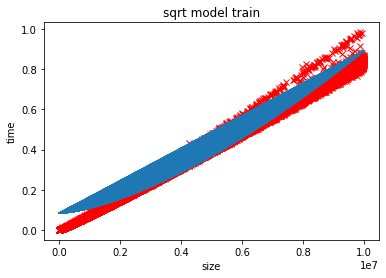

sqrt model test 1:
R squre: -1.288931339019113
Mean squared error: 3.3324795244541043
Mean absolute error: 1.695844271580312


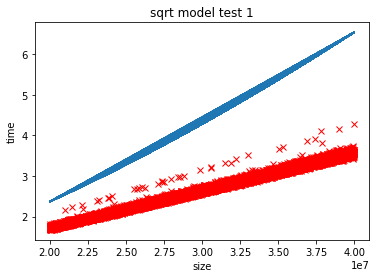

sqrt model test 2:
R squre: -13.74270057642231
Mean squared error: 43.50605250906081
Mean absolute error: 6.492156050019306


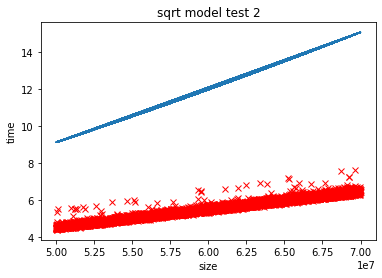

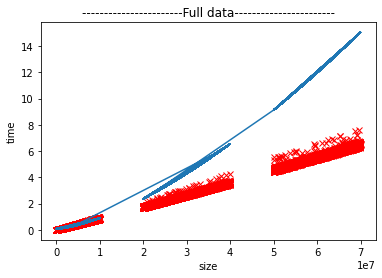

In [293]:
def function_sqrt(X):
  return X * np.sqrt(X)
transformation_function(function_sqrt, 'sqrt')

Thấy model này không được tốt lắm

$h(x) = \theta_1 * x \log{x} + \theta_0$

log model train:
R squre: 0.997946668090441
Mean squared error: 0.00012203439798746085
Mean absolute error: 0.006899424814228178


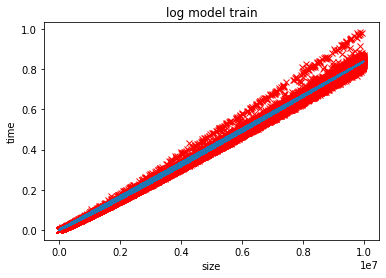

log model test 1:
R squre: 0.9819711183478046
Mean squared error: 0.005344034781896934
Mean absolute error: 0.0578374410090226


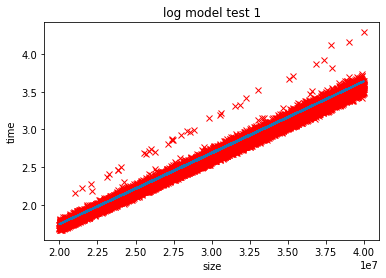

log model test 2:
R squre: 0.9385747836975529
Mean squared error: 0.019834206179683112
Mean absolute error: 0.11175157703649906


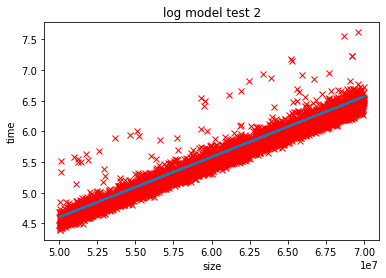

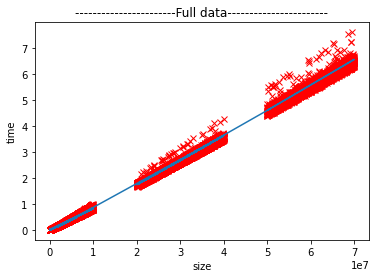

In [294]:
def function_log(X):
  return X * np.log(X)
transformation_function(function_log, 'log')

Thấy được kết quả khá là khả quan với mô hình x*log(x)lắm, mô hình không còn bị overfitting nữa

$h(x) = \theta_3 * x  + \theta_2 * x\log{x} + \theta_1 * x^2 + \theta_0$

Complex model train:
R squre: 0.9979488959749687
Mean squared error: 0.0001219022605101988
Mean absolute error: 0.00687149546733295


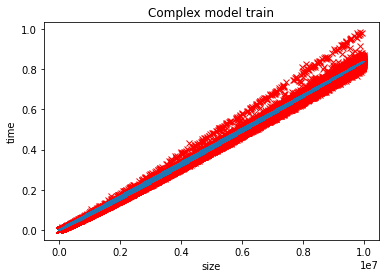

Complex model test 1:
R squre: 0.9854760837697532
Mean squared error: 0.004218181649828712
Mean absolute error: 0.05024641159839388


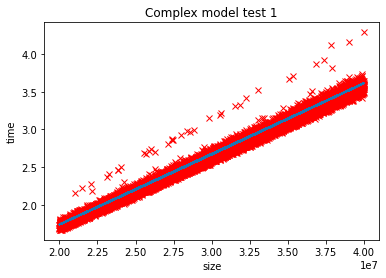

Complex model test 2:
R squre: 0.9527852444255402
Mean squared error: 0.014756533820276913
Mean absolute error: 0.08665167957459233


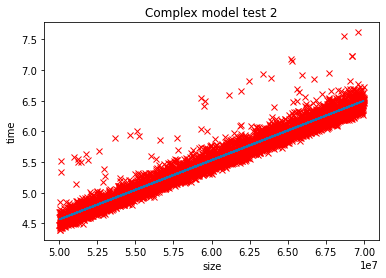

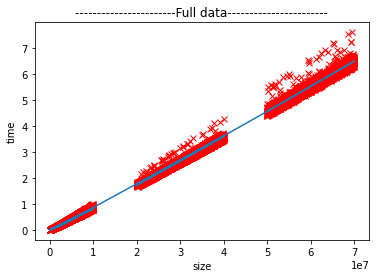

In [295]:
def complex_function(X):
  X_logx = X * np.log(X)
  X_square = X*X
  result = np.concatenate((X, X_logx, X_square), axis=1)
  return result

transformation_function(complex_function, 'Complex')